# Initial EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder

In [2]:
df = pd.read_csv("/Users/sa10/Downloads/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.shape

(6362620, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
fraud_counts = df['isFraud'].value_counts()
fraud_count = fraud_counts.get(1, 0)
print(f"Number of fraudulent cases: {fraud_count}")

Number of fraudulent cases: 8213


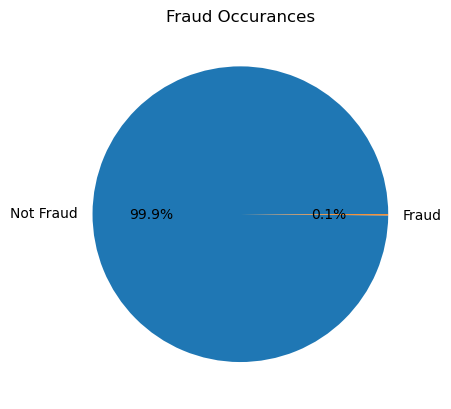

In [11]:
plt.figure()
df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', labels=["Not Fraud", "Fraud"])
plt.title("Fraud Occurances")
plt.ylabel('')
plt.show()

When looking at all the data gathered, the percentage of fraudulence compared to non-fraudulence is very low. Fraud appears to be only 0.1% of the dataset, which contains 6,362,620 lines of data.

In [13]:
flagged_fraud_counts = df['isFlaggedFraud'].value_counts()
flagged_fraud_count = flagged_fraud_counts.get(1, 0)
print(f"Number of flagged fraudulent cases: {flagged_fraud_count}")

Number of flagged fraudulent cases: 16


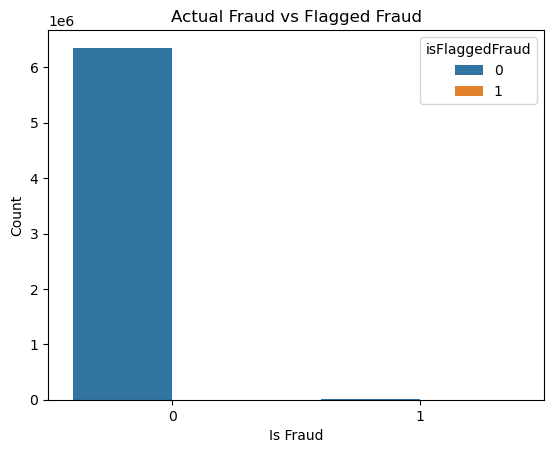

In [17]:
sns.countplot(data=df, x='isFraud', hue='isFlaggedFraud')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.title('Actual Fraud vs Flagged Fraud')
plt.show()

When comparing the occurrence of fraud to the fraud that has been flagged or detected, we can see a significant disparity between them. There are a total of 16 flagged fraud cases compared to the actual 8,213 fraud cases. This means that whichever system is in charge of detecting fraud is only doing so successfully at a 0.002% rate.

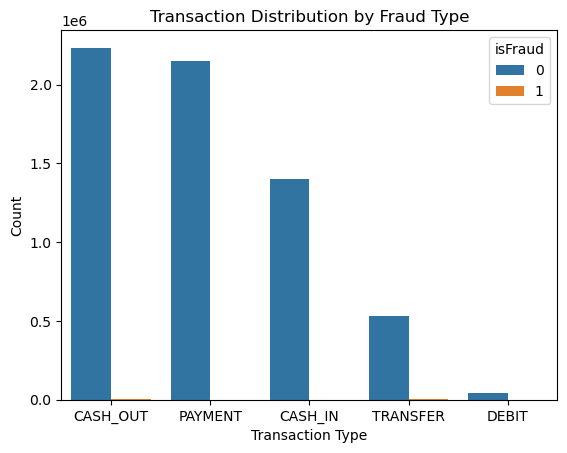

In [20]:
sns.countplot(data=df, x='type', hue='isFraud', order=df['type'].value_counts().index)

plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Distribution by Fraud Type')

plt.show()

This shows the distribution of transactions by type. It also highlights where most of the fraud is occurring. As we can see, 'cash_out' and 'transfer' are the only transaction types with fraudulent activity

In [25]:
fraud_in_types = df.groupby('type').agg(
    fraud_count=('isFraud', 'sum'),
    flagged_fraud_count=('isFlaggedFraud', 'sum')
).reset_index()

print(fraud_in_types)

       type  fraud_count  flagged_fraud_count
0   CASH_IN            0                    0
1  CASH_OUT         4116                    0
2     DEBIT            0                    0
3   PAYMENT            0                    0
4  TRANSFER         4097                   16


The only fruad that was detected was when the transactions were done by transfer.

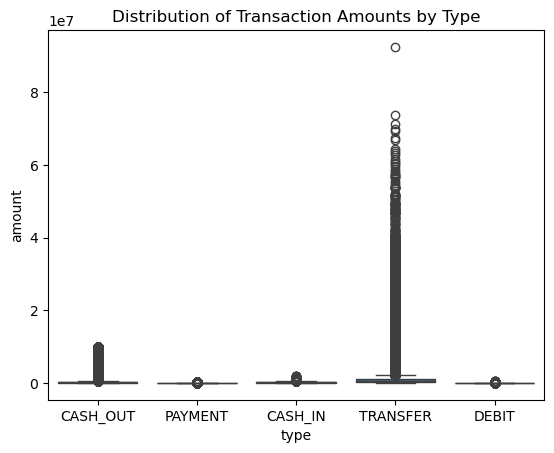

In [58]:
plt.figure()
sns.boxplot(data=df, x='type', y='amount', order=df['type'].value_counts().index)
plt.title('Distribution of Transaction Amounts by Type')
plt.show()

Cash out and transfer have more variablity meaning it may be more difficult to detect fraud which could be why it is only effecting these tpes of transactions.

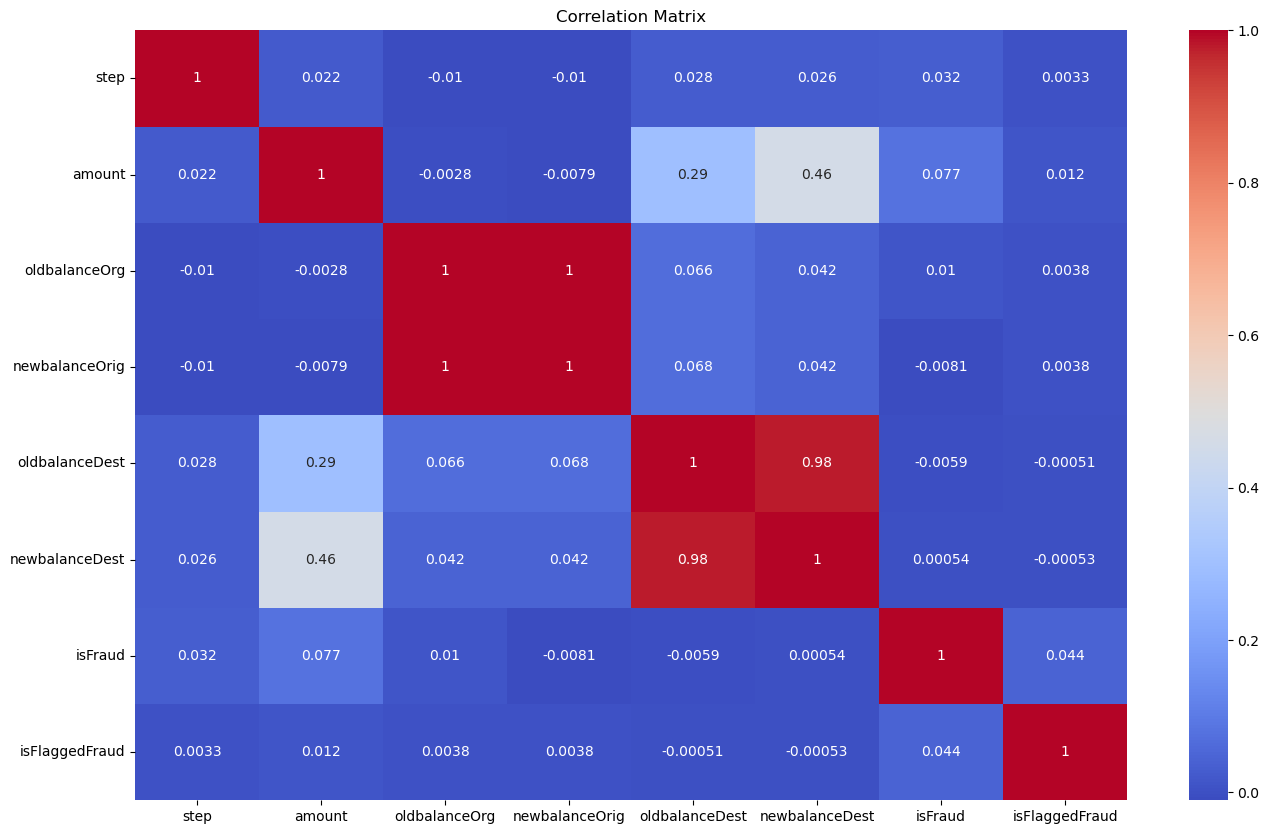

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='muted')
plt.title('Correlation Matrix')
plt.show()

The amount, step, and original balance destination are the ones that have a higher correlation with unflagged fraud, meaning this is something we should look into further.

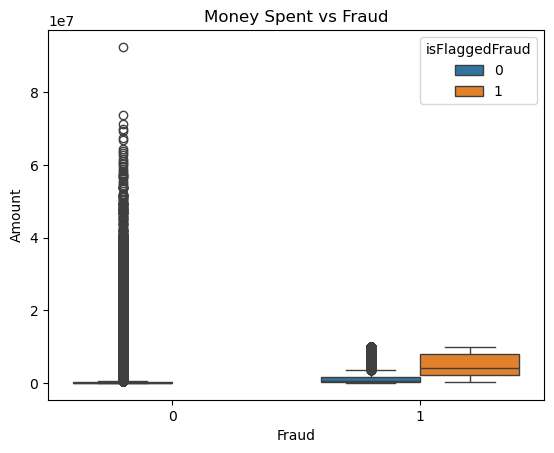

In [42]:
plt.figure()
sns.boxplot(data=df, x='isFraud', y='amount', hue='isFlaggedFraud')

# Add labels and title
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.title('Money Spent vs Fraud')

# Display the plot
plt.show()

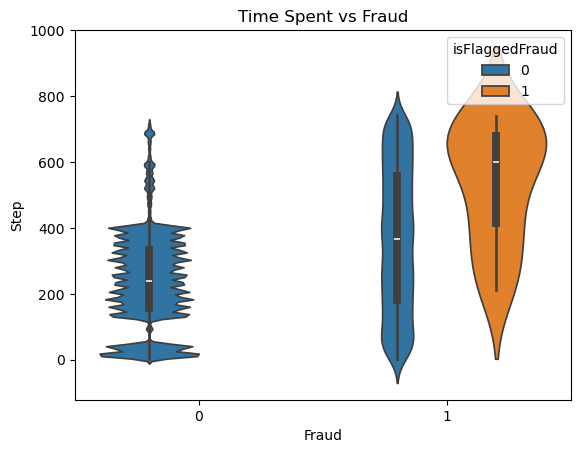

In [ ]:
plt.figure()
sns.swarmplot(data=df, x='isFraud', y='step', hue='isFlaggedFraud')

# Add labels and title
plt.xlabel('Fraud')
plt.ylabel('Step')
plt.title('Time Spent vs Fraud')

# Display the plot
plt.show()